## NCW Survey data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
Ncw_numerical_renamed=pd.read_excel('Ncw_numerical_renamed.xlsx')

In [4]:
Ncw_numerical_original=pd.read_excel('Ncw_numerical_original.xlsx')

In [5]:
Ncw_categorical_original=pd.read_excel('Ncw_categorical_original.xlsx')

## Questions

In [6]:
Q1="The employer has clearly specified the policy guidelines to the employees in the appointment order"
Q2="The organisation has educated employees on women welfare measures / schemes available in the establishment"
Q3="The organization promotes employees to different cadres regularly."
Q4="The organization offers training to enhance job skills and promotional avenues"
Q5="The frequency of promotional opportunities is"
Q6="The job roles and responsibilities are well defined."
Q7="The organization counsels and has well defined career path for every employee."
Q8="The organisation provides adequate compensation package based on the capability and potential of the employees"
Q9="The organization provides well-defined pay scale to every employee"
Q10="The organization provides adequate financial assistance to employees for on-duty travel."
Q11="The organization has a policy to provide  Fixed annual increment"
Q12="The organization has a policy to provide  Performance related variable pay package"
Q13="Foreign travel policy of the organization covers all business related tours and exigencies."
Q14="The reward for doing good work can be counted on One time financial incentive"
Q15="The reward for doing good work can be counted on Higher / additional responsibility"
Q16="The reward for doing good work can be counted on Promotion"
Q17="The reward for doing good work can be counted on Employee Stock Option Plan (ESOP)"
Q18="The organization provides Employee Stock Option Plan (ESOP) facility"
Q19="The percentage of Employee Stock Option Plan facility provided by the organization"
Q20="The organization provides encouragement for suggestions & innovation in institutional processes"
Q21="The organization provides fair & equitable promotional policy (No gender bias)"
Q22="The organization policies supports learning and development of an individual employee on a continuous basis"
Q23="The organization policies provides conducive motivational avenues for employees"
Q24="The organization environment is conducive for good health and & Quality of Life to Individuals working with the Company"
Q25="The organization environment is conducive for good health and & Quality of Life to immediate family members"
Q26="The organization provides flexible working hours with maximum 48 hours working per week."
Q27="The organization has formed a grievance redressal committee for addressing harrassement and other issues of women"
Q28="The grievance redressal committee is effectively functioning"
Q29="Employees are generally able to balance work priorities with personal and social life"
Q30="The organization provides flexible work schedule to meet employees personal/family responsibilities"
Q31="Performance appraisal system in the organization is transparent and open"
Q32="Health Care benefits provided by the organization to the employees are sufficient."
Q33="Employees are happy with the assistance given by the company in terms of awards, rewards and recognition"
Q34="The organization is providing sufficient basic amenities such as Restrooms"
Q35="The organization is providing sufficient basic amenities such as Crches"
Q36="The organization is providing sufficient basic amenities such as Sports"
Q37="The organization is providing sufficient basic amenities such as Recreational clubs"
Q38="The organisation provides adequate secured transport facilities to the employees for commuting back and forth from their residence to the place of work as well as for business related local travel"
Q39="The organisation provides the following leave facilities to the employees.Maternity Leave with pay During probationary"
Q40="The organisation provides the following leave facilities to the employees.Maternity Leave with pay After confirmation"
Q41="The organisation provides the following leave facilities to the employees.Paternity Leave with pay"
Q42="The organisation provides the following leave facilities to the employees.Miscarriage / premature termination of pregnancy leave with pay"
Q43="The organisation provides the following leave facilities to the employees.Annual Leave / statutory leave"
Q44="The organisation provides the following leave facilities to the employees.Encashment Leave"
Q45="The organisation provides the following leave facilities to the employees.Medical (Sick) Leave"
Q46="The organisation provides the following leave facilities to the employees.Special needs leave (Extended maternity leave, pre delivery pregnancy related rest)"
Q47="The organisation provides the following leave facilities to the employees.Child care leave"
Q48="The organisation provides the following leave facilities to the employees.Leave for child adoption"
Q49="Company name"

In [7]:
Ncw_numerical_renamed.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48
0,5,5,4,4,2,5,5,5,5,5,...,0,90,5,20,10,10,2,0,15,15
1,5,4,4,5,4,4,4,4,5,4,...,90,90,5,20,10,10,2,15,0,0
2,4,4,4,5,2,5,5,4,4,4,...,90,90,10,20,15,10,2,15,15,15
3,5,5,4,4,4,4,4,5,4,4,...,90,90,5,20,12,15,4,30,30,15
4,4,4,4,4,2,4,4,4,4,4,...,90,90,15,40,10,10,6,15,15,15


In [8]:
Ncw_numerical_original.head(5)

,Clearly defined policy guidelines in appointment order,women welfare and scheme education,regular promotions to different cadres,training to enhance job skills and promotional avenues,frequency of promotional opportunities (Years),well defined job roles,career path counselling facility,adequate compensation package based skills,well defined pay-scale,financial assistance for on-duty travel,...,Maternity Leave with pay During probationary (Days),Maternity Leave with pay after confirmation (Days),Paternity Leave with pay (Days),Miscarriage / premature termination of pregnancy leave with pay (Days),statutory leave (Days),Encashment Leave (Days),Sick leave (Days),Special needs leave (Days),Child care leave (Days),Child Adoption Leave (Days)
0,5,5,4,4,2,5,5,5,5,5,...,0,90,5,20,10,10,2,0,15,15
1,5,4,4,5,4,4,4,4,5,4,...,90,90,5,20,10,10,2,15,0,0
2,4,4,4,5,2,5,5,4,4,4,...,90,90,10,20,15,10,2,15,15,15
3,5,5,4,4,4,4,4,5,4,4,...,90,90,5,20,12,15,4,30,30,15
4,4,4,4,4,2,4,4,4,4,4,...,90,90,15,40,10,10,6,15,15,15


In [9]:
Ncw_categorical_original.head(2)

,Clearly defined policy guidelines in appointment order,women welfare and scheme education,regular promotions to different cadres,training to enhance job skills and promotional avenues,frequency of promotional opportunities (Years),well defined job roles,career path counselling facility,adequate compensation package based skills,well defined pay-scale,financial assistance for on-duty travel,...,Maternity Leave with pay after confirmation (Days),Paternity Leave with pay (Days),Miscarriage / premature termination of pregnancy leave with pay (Days),statutory leave (Days),Encashment Leave (Days),Sick leave (Days),Special needs leave (Days),Child care leave (Days),Child Adoption Leave (Days),Company Name
0,Strongly Agree,Strongly Agree,Agree,Agree,Upto 2 Years,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Upto 90 Days,Upto 5 Days,Upto 20 Days,Upto 10 Days,Upto 10 Days,Upto 2 Days,No Leave,Upto 15 Days,Upto 15 Days,Huawei
1,Strongly Agree,Agree,Agree,Strongly Agree,Upto 4 Years,Agree,Agree,Agree,Strongly Agree,Agree,...,Upto 90 Days,Upto 5 Days,Upto 20 Days,Upto 10 Days,Upto 10 Days,Upto 2 Days,Upto 15 Days,No Leave,No Leave,TCS


In [10]:
responses={1:'Strongly Disagree',2:'Disagree',3:'Neutral',4:'Agree',5:'Strongly Agree'}

In [21]:
print(Ncw_numerical_original.shape) # to determine no. of instances and fields in the data
print(Ncw_categorical_original.shape)
print(Ncw_numerical_renamed.shape)

(732, 48)
(732, 49)
(732, 48)


In [12]:
# likert scale responses
print(responses[1])
print(responses[2])
print(responses[3])
print(responses[4])
print(responses[5])

Strongly Disagree
Disagree
Neutral
Agree
Strongly Agree


In [13]:
# Creating dataframe 
dfno=pd.DataFrame(Ncw_numerical_original)
dfco=pd.DataFrame(Ncw_categorical_original)
dfnr=pd.DataFrame(Ncw_numerical_renamed)

<AxesSubplot:>

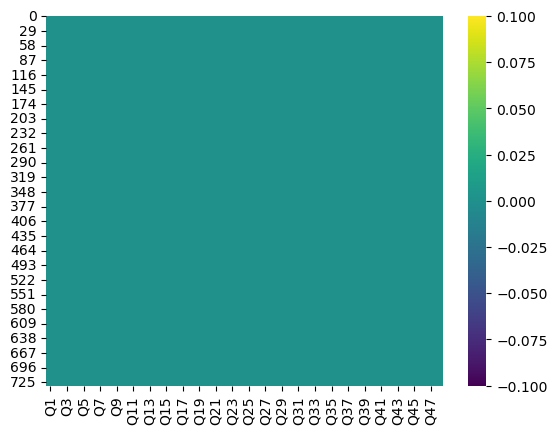

In [14]:
# Heat Map to visualize null values if any
sns.heatmap(dfnr.isnull(),cmap='viridis')

## Getting Insights from survey data

Pie charts are not the best choice for displaying Likert scale data because they are better suited for displaying nominal or categorical data where each category represents a portion of the whole. Likert scale data, on the other hand, has an inherent ordinal structure, which means that the categories have a natural order and the differences between them may not be equal. Therefore, a bar chart or stacked bar chart is a better choice for displaying Likert scale data.

That being said, if you still want to create a pie chart for a Likert scale column, you can use the value_counts() function in pandas to count the number of occurrences of each response and create a pie chart using the plot.pie() function in pandas


In [15]:
Questions={1:Q1,2:Q2,3:Q3,4:Q4,5:Q5,6:Q6,7:Q7,8:Q8,9:Q9,10:Q10,11:Q11,12:Q12,13:Q13,14:Q14,15:Q15,16:Q16,17:Q17,18:Q18,
           19:Q19,20:Q20,21:Q21,22:Q22,23:Q23,24:Q24,25:Q25,26:Q26,27:Q27,28:Q28,29:Q29,30:Q30,31:Q31,32:Q32,33:Q33,34:Q34,
           35:Q35,36:Q36,37:Q37,38:Q38,39:Q39,40:Q40,41:Q41,42:Q42,43:Q43,44:Q44,45:Q45,46:Q46,47:Q47,48:Q48,49:Q49}

## Countplot and pie chart visualizations

Enter Question No. from 1 to 48  4
The organization offers training to enhance job skills and promotional avenues


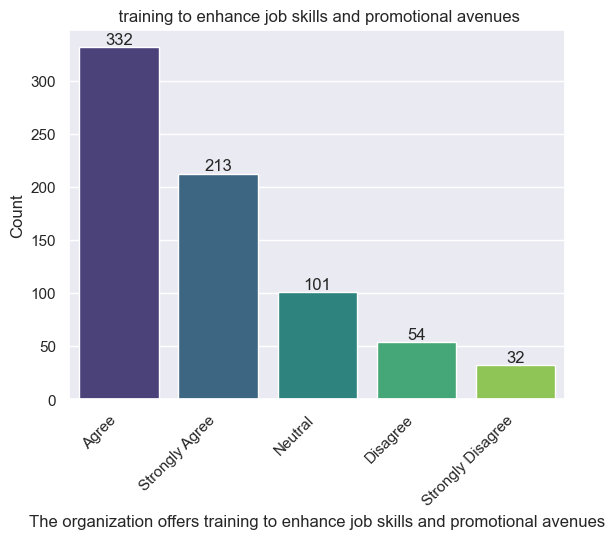

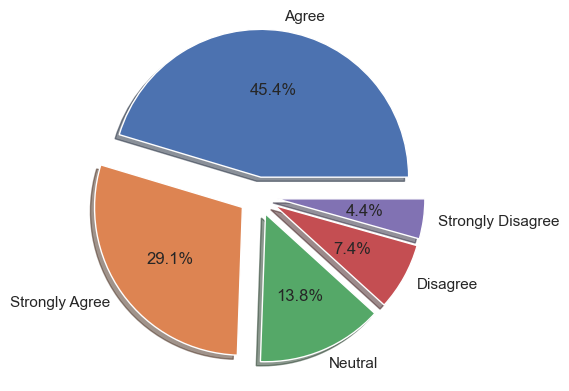

In [19]:
ques_value=int(input("Enter Question No. from 1 to 48  "))
column_index=ques_value-1

#-----------------------------------------------------------------------------------------------------------
def plot_count_plot(dataframe, column_index):
    print(Questions[ques_value])
    try:
        column_name = dataframe.columns[column_index]
    except IndexError:
        print("Column number is out of range.")
        return

    try:
        column_data = dataframe.iloc[:, column_index]
    except IndexError:
        print("Column number is out of range.")
        return

    # Remove any NaN values from the column data
    column_data = column_data.dropna()

    if column_data.empty:
        print("The selected column does not contain any valid data.")
        return

    # Plot the count plot
    sns.set(style="darkgrid")
    plt.figure()
    ax=sns.countplot(x=column_data, palette='viridis')
    plt.xlabel(Questions[ques_value])
    plt.ylabel('Count')
    plt.title(column_name)
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage labels to each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height, f'{height:}', ha='center', va='bottom')
#---------------------------------------------------------------------------------------------------------

def plot_pie_chart(dataframe, column_index):
    try:
        column_name = dataframe.columns[column_index]
    except IndexError:
        print("Column index is out of range.")
        return

    column_data = dataframe.iloc[:, column_index]

     # Remove any NaN values from the column data
    column_data = column_data.dropna()

    if column_data.empty:
        print("The selected column does not contain any valid data.")
        return

    # Plot the pie chart
    plt.figure()
    value_counts = column_data.value_counts()
    explode = [0.13] * len(value_counts)
    plt.pie(column_data.value_counts(),labels=column_data.value_counts().index,explode=explode,autopct='%1.1f%%',shadow=True,)
    plt.show()
#---------------------------------------------------------------------------------------------------------
plot_count_plot(dfco,column_index)
plot_pie_chart(dfco,column_index)



## Statistical Analysis 

In [17]:
def analyze_dataframe(dataframe):
    summary_data = []
    
    for column in dataframe.columns:
        column_data = dataframe[column]

        # Determine the data type of the column
        data_type = str(column_data.dtype)

        # Compute summary statistics
        if pd.api.types.is_numeric_dtype(column_data):
            stats = {
                'Column': column,
                'Data Type': data_type,
                'Mean': column_data.mean(),
                'Median': column_data.median(),
                'Std Deviation': column_data.std(),
                '25th Percentile': column_data.quantile(0.25),
                '75th Percentile': column_data.quantile(0.75)
            }
        else:
            stats = {
                'Column': column,
                'Data Type': data_type,
                'Value Counts': column_data.value_counts().to_dict()
            }

        summary_data.append(stats)

        # Create plots based on the data type
        if pd.api.types.is_numeric_dtype(column_data):
            plt.figure()
            sns.histplot(column_data, kde=True)
            plt.title(f'{column}')
            #plt.xlabel(column)
            plt.show()
        else:
            plt.figure()
            sns.countplot(x=column_data, palette='viridis')
            plt.title(f'{column}')
            #plt.xlabel(column)
            plt.xticks(rotation=45, ha='right')
            plt.show()

    # Display the summary statistics
    summary_df = pd.DataFrame(summary_data)
    print("Summary Statistics:")
    print(summary_df)
#----------------------------------------------------------------------
analyze_dataframe(dfn)

NameError: name 'dfn' is not defined

In [ ]:
dfco.shape

## Questions

In [ ]:
Q1="The employer has clearly specified the policy guidelines to the employees in the appointment order"
Q2="The organisation has educated employees on women welfare measures / schemes available in the establishment"
Q3="The organization promotes employees to different cadres regularly."
Q4="The organization offers training to enhance job skills and promotional avenues"
Q5="The frequency of promotional opportunities is"
Q6="The job roles and responsibilities are well defined."
Q7="The organization counsels and has well defined career path for every employee."
Q8="The organisation provides adequate compensation package based on the capability and potential of the employees"
Q9="The organization provides well-defined pay scale to every employee"
Q10="The organization provides adequate financial assistance to employees for on-duty travel."
Q11="The organization has a policy to provide  Fixed annual increment"
Q12="The organization has a policy to provide  Performance related variable pay package"
Q13="Foreign travel policy of the organization covers all business related tours and exigencies."
Q14="The reward for doing good work can be counted on One time financial incentive"
Q15="The reward for doing good work can be counted on Higher / additional responsibility"
Q16="The reward for doing good work can be counted on Promotion"
Q17="The reward for doing good work can be counted on Employee Stock Option Plan (ESOP)"
Q18="The organization provides Employee Stock Option Plan (ESOP) facility"
Q19="The percentage of Employee Stock Option Plan facility provided by the organization"
Q20="The organization provides encouragement for suggestions & innovation in institutional processes"
Q21="The organization provides fair & equitable promotional policy (No gender bias)"
Q22="The organization policies supports learning and development of an individual employee on a continuous basis"
Q23="The organization policies provides conducive motivational avenues for employees"
Q24="The organization environment is conducive for good health and & Quality of Life to Individuals working with the Company"
Q25="The organization environment is conducive for good health and & Quality of Life to immediate family members"
Q26="The organization provides flexible working hours with maximum 48 hours working per week."
Q27="The organization has formed a grievance redressal committee for addressing harrassement and other issues of women"
Q28="The grievance redressal committee is effectively functioning"
Q29="Employees are generally able to balance work priorities with personal and social life"
Q30="The organization provides flexible work schedule to meet employees personal/family responsibilities"
Q31="Performance appraisal system in the organization is transparent and open"
Q32="Health Care benefits provided by the organization to the employees are sufficient."
Q33="Employees are happy with the assistance given by the company in terms of awards, rewards and recognition"
Q34="The organization is providing sufficient basic amenities such as Restrooms"
Q35="The organization is providing sufficient basic amenities such as Crches"
Q36="The organization is providing sufficient basic amenities such as Sports"
Q37="The organization is providing sufficient basic amenities such as Recreational clubs"
Q38="The organisation provides adequate secured transport facilities to the employees for commuting back and forth from their residence to the place of work as well as for business related local travel"
Q39="The organisation provides the following leave facilities to the employees.Maternity Leave with pay During probationary"
Q40="The organisation provides the following leave facilities to the employees.Maternity Leave with pay After confirmation"
Q41="The organisation provides the following leave facilities to the employees.Paternity Leave with pay"
Q42="The organisation provides the following leave facilities to the employees.Miscarriage / premature termination of pregnancy leave with pay"
Q43="The organisation provides the following leave facilities to the employees.Annual Leave / statutory leave"
Q44="The organisation provides the following leave facilities to the employees.Encashment Leave"
Q45="The organisation provides the following leave facilities to the employees.Medical (Sick) Leave"
Q46="The organisation provides the following leave facilities to the employees.Special needs leave (Extended maternity leave, pre delivery pregnancy related rest)"
Q47="The organisation provides the following leave facilities to the employees.Child care leave"
Q48="The organisation provides the following leave facilities to the employees.Leave for child adoption"

## Correlation Analysis 

Certain Questions in the Survey are similar in terms of User Response . Correlation Analysis between those questions is done to find how much related the two questions are and action can be taken to reduce no. of questions in survey when possible.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your survey data loaded into a pandas DataFrame called 'survey_data'
# Replace 'survey_data' with the actual name of your DataFrame

# Define the threshold for positive correlation
correlation_threshold = 0.5

# Create a correlation matrix for all columns in the DataFrame
correlation_matrix = dfnr.corr()

# Get the column names
columns = dfnr.columns

# List to store column names to remove
columns_to_remove = []

# Loop through the columns and check for positive correlation
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        correlation_value = correlation_matrix.loc[columns[i], columns[j]]
        if correlation_value > correlation_threshold:
            # If positive correlation is found, add the column with higher index to the removal list
            columns_to_remove.append(columns[j])

# Remove duplicate column names from the removal list
columns_to_remove = list(set(columns_to_remove))

# Plot the correlation matrix for the remaining columns
plt.figure(figsize=(10, 8))
sns.heatmap(.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


NameError: name 'survey_data' is not defined

<Figure size 1000x800 with 0 Axes>

Enter a tuple containing question indics (comma-separated values):  1,2
Enter a tuple containing question indics (comma-separated values):  1,3
Enter a tuple containing question indics (comma-separated values):  1,4
Enter a tuple containing question indics (comma-separated values):  1,5
Enter a tuple containing question indics (comma-separated values):  1,6
Enter a tuple containing question indics (comma-separated values):  stop
Given Question set: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]


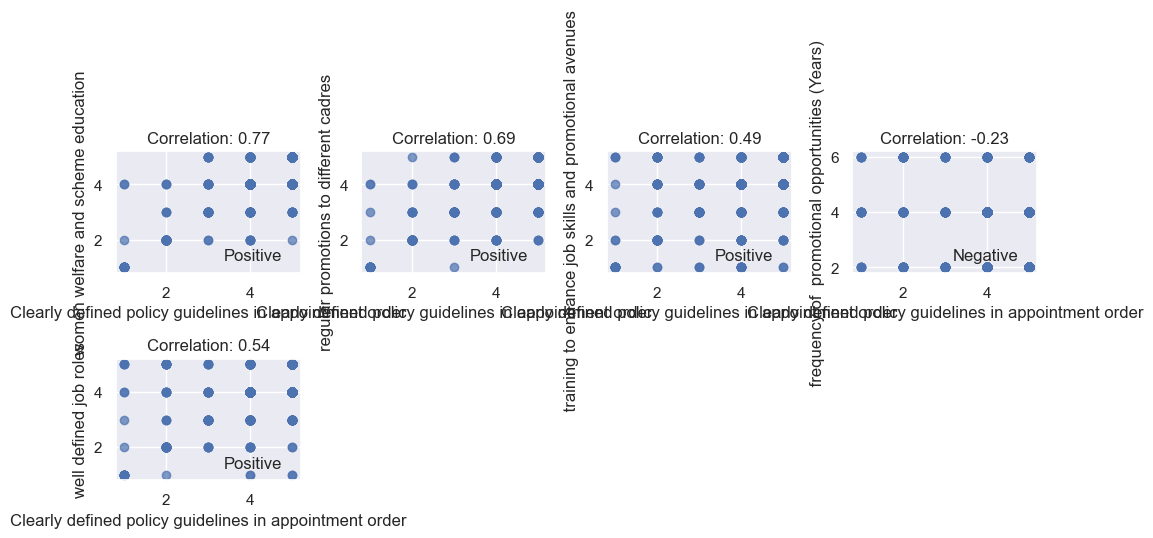

None


In [27]:
# Finding Correlation coefficients

# Initialize an empty list to store the tuples
question_sets =[]
question_set: [(48, 47), (46, 48), (43, 44), (39, 40), (37, 38), (31, 33), (29, 30), (27, 28), (26, 30), (23, 25),
               (21, 22), (17, 18), (16, 21), (9, 11), (8, 14), (9, 11)]

# Define a loop to receive multiple tuples from the user
while True:
    # Get input from the user as a comma-separated string
    input_str = input("Enter a tuple containing question indics (comma-separated values):  ")

    # Check if the user wants to stop entering tuples
    if input_str.lower() == 'stop':
        break

    try:
        # Convert the comma-separated string to a tuple
        user_tuple = tuple(map(int, input_str.split(',')))  # Replace 'int' with appropriate data types if needed

        # Append the tuple to the list
        question_sets.append(user_tuple)
    except ValueError:
        print("Invalid input! Please enter a valid tuple.")

# Print the list of tuples
print("Given Question set:",question_sets)



def correlation_and_plot(df, question_sets):
    
        # Initialize a figure for plotting
    plt.figure(figsize=(10, 8))

    # Loop through each question set and calculate the correlation coefficient
    for i, (q1, q2) in enumerate(question_sets):
        # Get the data for the two questions
        
        column_name1=dfno.columns[q1-1]
        column_name2=dfno.columns[q2-1]

       
        data_q1 = dfnr['Q'+str(q1)]
        data_q2 = dfnr['Q'+str(q2)]

        # Calculate the correlation coefficient
        correlation_coefficient = data_q1.corr(data_q2)

        # Plot the scatter plot
        plt.subplot(4,4, i + 1)  # Creating a subplot for each question set
        plt.scatter(data_q1, data_q2, alpha=0.7)
        
        plt.xlabel(column_name1)
        plt.ylabel(column_name2)
        
        plt.title(f'Correlation: {correlation_coefficient:.2f}')

        # Highlight the positive or negative correlation
        if correlation_coefficient > 0:
            plt.text(0.9, 0.1, 'Positive', transform=plt.gca().transAxes, ha='right')
        elif correlation_coefficient < 0:
            plt.text(0.9, 0.1, 'Negative', transform=plt.gca().transAxes, ha='right')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a DataFrame 'df' containing the data, and 'question_sets' is a list of tuples.
# Each tuple in 'question_sets' should contain two column names representing the questions to analyze.

print(correlation_and_plot(dfno, question_sets))


In [ ]:
dfno

Deciding the number of components for PCA in survey data with 48 columns involves finding a balance between reducing dimensionality while retaining enough information. Here are some common methods to determine the appropriate number of components for PCA:

1. **Explained Variance Threshold:** Plot the cumulative explained variance as a function of the number of components. Choose the number of components that explain a substantial amount of the total variance (e.g., 90% or 95%). This method ensures that most of the variability in the data is retained while reducing the dimensionality.

2. **Scree Plot:** Create a scree plot by plotting the eigenvalues of the components in descending order. Look for the "elbow point," where the eigenvalues level off. The number of components corresponding to this point is often chosen as it represents a significant drop in eigenvalue and hence, captures the main variance.

3. **Kaiser's Rule:** Kaiser's rule suggests retaining only components with eigenvalues greater than 1. This method keeps components that explain more variance than a single original variable would.

4. **Cross-Validation:** If you plan to use the PCA for a specific modeling or analysis task, you can use cross-validation to evaluate different numbers of components' performance. Choose the number of components that result in the best performance (e.g., lowest prediction error) on the validation set.

5. **Domain Knowledge and Interpretability:** Consider the interpretability of the components and the specific goals of your analysis. Sometimes, it's essential to retain more components if they have meaningful interpretations and are relevant to your research questions.

6. **Eigenvalue Drop-off:** Examine the rate at which eigenvalues drop off in the scree plot. If there is a clear point where the drop-off becomes more gradual, it can indicate a natural "cut-off" for the number of components to retain.

7. **Parallel Analysis:** This statistical technique compares the eigenvalues from the PCA to random data (simulated noise). Components with eigenvalues greater than those in the random data are considered significant. This method helps determine which components to retain.

8. **Cross-Validation for Specific Task:** If you plan to use PCA as a preprocessing step for a specific task (e.g., clustering or classification), you can use cross-validation on that task to find the optimal number of components that lead to the best performance.

Remember that PCA is an unsupervised technique, and the number of components is usually decided based on the characteristics of the data and the objectives of the analysis. Experimenting with different approaches and comparing their outcomes can help you select the most suitable number of components for your survey data.

## Application of PCA

## Standard scaling of numerical data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dfno)
scaled_data_NCW=scaler.transform(dfno)
print(scaled_data_NCW)

Enter no. of components for pca  2


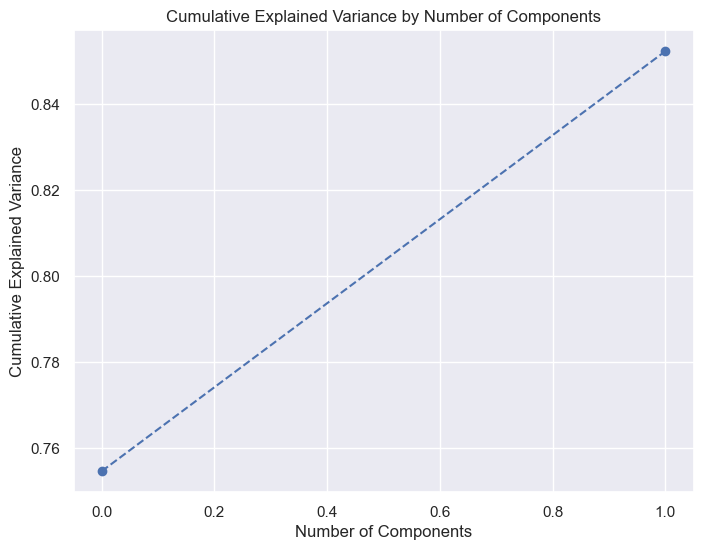

In [28]:
from sklearn.decomposition import PCA

components=int(input('Enter no. of components for pca  '))
survey_data = dfno

# Perform PCA
pca = PCA(n_components=components)
pca.fit(survey_data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(0,components), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()


Interpreting the explained variance plot obtained from Principal Component Analysis (PCA) is crucial for understanding how much information is retained when reducing the dimensionality of your data. The plot typically shows the cumulative explained variance as a function of the number of components. Here's how to interpret it:

1. **Variance Explained by Each Component:** Each point on the plot represents the amount of variance explained by each principal component. The first point corresponds to the variance explained by the first principal component, the second point represents the variance explained by the first two principal components, and so on.

2. **Cumulative Explained Variance:** The plot shows the cumulative explained variance, which is the sum of the variances explained by all the principal components up to a certain point. The last point on the plot represents the cumulative explained variance of all the components, which should be equal to 1 (100%).

3. **Steepness of the Curve:** Pay attention to the steepness of the curve. In the beginning, the curve might be steep, indicating that each additional component explains a substantial amount of variance. As you move towards the end, the curve might become flatter, suggesting that additional components explain less variance.

4. **"Elbow" Point:** Look for an "elbow" point on the plot, which is a point where the curve changes from being steep to becoming flatter. The elbow point indicates the number of components where adding more components does not significantly contribute to the cumulative explained variance. It is often a good indicator of the appropriate number of components to retain for dimensionality reduction.

5. **Choosing the Number of Components:** The number of components you decide to retain depends on your specific goals and the level of variance you want to capture. A common approach is to choose the number of components that explain a certain percentage of the total variance, such as 90% or 95%. This ensures that you retain most of the important information while reducing the dimensionality.

6. **Interpretability vs. Variance Explained:** It's important to strike a balance between interpretability and variance explained. Sometimes, retaining a smaller number of components that explain slightly less variance can result in more interpretable components, making it easier to understand the underlying patterns in the data.

Overall, the explained variance plot helps you make informed decisions about the number of components to retain for your analysis. It allows you to understand how well the principal components capture the variability in your data and guides you in choosing an appropriate trade-off between dimensionality reduction and retaining meaningful information.

Give no. of dimensions for pca  2


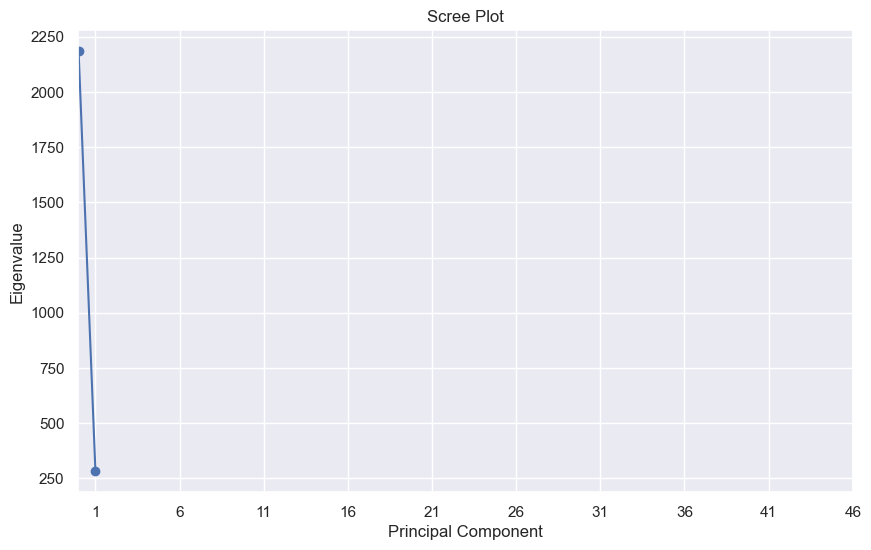

In [30]:
from sklearn.decomposition import PCA
components=int(input("Give no. of dimensions for pca  "))
survey_data_screeplot = dfno

# Perform PCA
pca = PCA(n_components=components)
pca.fit(survey_data_screeplot)

# Get the eigenvalues of the principal components
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(0,components), eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(np.arange(1, 49, step=5))  # Optionally, adjust x-axis ticks for better readability
plt.grid(True)
plt.show()


## Company-wise response analysis

In [ ]:
dfco['Company Name'].value_counts()

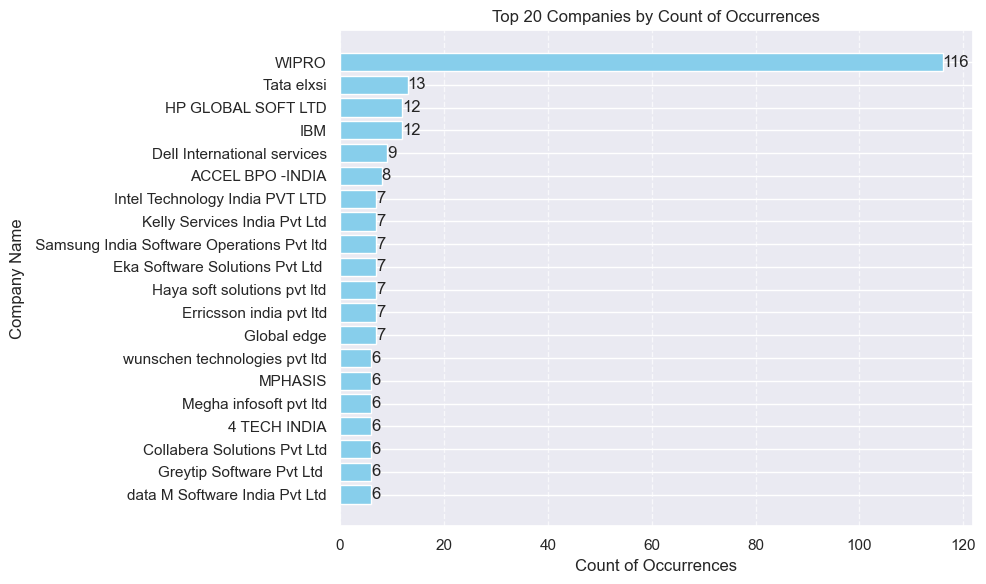

In [31]:
# Count the occurrences of each company in the 'company name' column
company_counts = dfco['Company Name'].value_counts()

# Sort the companies based on their counts in descending order and select the top 10
top_10_companies = company_counts.nlargest(20)
top_10_companies = top_10_companies.iloc[::-1]

# Plot the horizontal bar chart for the top 10 companies
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_companies.index, top_10_companies.values, color='skyblue')

# Add exact count values as annotations near the respective bars
for bar, count in zip(bars, top_10_companies.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center', fontsize=12)

plt.xlabel('Count of Occurrences')
plt.ylabel('Company Name')
plt.title('Top 20 Companies by Count of Occurrences')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensures all labels are visible
plt.show()



## Clustering - Unsupervised ML
Clustering in survey data without a target variable is an unsupervised machine learning technique used to group similar observations or respondents based on their similarities in feature space. In this context, a survey dataset typically contains multiple attributes (features) representing the responses or characteristics of the respondents.

Without a target variable (or outcome variable), the objective of clustering is to identify inherent patterns or structures within the data. Clustering algorithms, such as K-Means, DBSCAN, Agglomerative Clustering, etc., aim to partition the data into groups, known as clusters, such that data points within the same cluster are more similar to each other than to those in other clusters.

The process of clustering survey data without a target variable can serve several purposes:

1. **Data Exploration:** Clustering allows you to explore the underlying structure and natural groupings within the survey data. By examining the clusters, you may discover patterns, segments, or subgroups among respondents with similar characteristics or preferences.

2. **Segmentation:** Clustering can be used for customer segmentation, market segmentation, or any form of respondent grouping based on their shared attributes. These segments can provide valuable insights for targeted marketing, product/service customization, and decision-making.

3. **Anomaly Detection:** Clustering can also help identify outliers or anomalies in the data that do not belong to any of the identified clusters. These outliers may represent unusual or unique respondents with distinct characteristics.

4. **Feature Selection:** Clustering can aid in feature selection by identifying which attributes contribute most to the differentiation between clusters. This can be valuable for understanding the most relevant features in distinguishing different respondent groups.

5. **Data Preprocessing:** In some cases, clustering can be used as a preprocessing step before applying supervised learning techniques. By grouping similar respondents together, clustering may help reduce data dimensionality and improve the performance of subsequent supervised algorithms.

It's important to note that the interpretation of the clusters and the choice of clustering algorithm and parameters depend on the data, its characteristics, and the specific goals of the analysis. Proper evaluation of clustering results using

## Cluster Analysis
Cluster analysis is a technique used to group similar observations into clusters based on the patterns of similarity or dissimilarity among the data. In the context of survey data, cluster analysis can be applied to group respondents with similar characteristics or responses into distinct segments.

Here's a general step-by-step guide to perform cluster analysis on survey data using Python:

1. **Data Preparation:** Load and preprocess your survey data. Make sure the data is cleaned, missing values are handled, and categorical variables (if any) are appropriately encoded for clustering analysis.

2. **Select Features:** Decide which features (columns) of the survey data you want to use for clustering. Consider using variables that are meaningful for your analysis and align with your research objectives.

3. **Standardize the Data (Optional):** Depending on the scale and nature of your features, you might consider standardizing the data to ensure that all variables have the same mean and variance. This step is optional but can be useful in some cases.

4. **Select the Number of Clusters:** Decide on the number of clusters you want to create. This can be determined based on your domain knowledge, business needs, or by using clustering evaluation metrics (e.g., the elbow method, silhouette score) to find the optimal number of clusters.

5. **Choose a Clustering Algorithm:** Select an appropriate clustering algorithm based on the nature of your data and the number of clusters you want to create. Common algorithms include K-means, hierarchical clustering, DBSCAN, and Gaussian Mixture Models (GMM).

6. **Perform Clustering:** Apply the chosen clustering algorithm to your data to create the clusters. Assign each data point (respondent) to the corresponding cluster based on their similarity to other data points.

7. **Visualize the Clusters:** Plot the clusters to visualize the grouping of data points based on the selected features. This can help you gain insights into the characteristics of each cluster.

8. **Interpret the Clusters:** Analyze the characteristics of each cluster to interpret the differences and similarities between them. This step involves understanding the attributes that distinguish one cluster from another.

9. **Evaluate and Validate:** Evaluate the quality of the clusters based on domain knowledge, clustering evaluation metrics, or by testing the clusters' performance in subsequent analyses.

10. **Use the Clusters:** Utilize the clusters for further analysis or decision-making based on your research objectives. Clusters can be useful for customer segmentation, targeted marketing, personalized recommendations, and more.

In Python, you can use libraries like `scikit-learn` for clustering algorithms and `matplotlib` or `seaborn` for data visualization. The specific code for cluster analysis will depend on the chosen algorithm and the details of your survey data. Remember that the interpretation and application of cluster analysis results require careful consideration and domain expertise.

Interpreting the visualization of clustering results involves understanding the grouping of data points in 2D space based on the selected features. In the given example, we used PCA to reduce the feature dimensions to 2, making it easier to visualize the clusters. Each data point is represented as a dot on the plot, and different clusters are shown in different colors.

Here are some steps to interpret the visualization:

1. **Cluster Separation:** Observe how well-separated the clusters are from each other. Ideally, clusters should be distinct and well-separated to indicate clear differences between the groups of data points.

2. **Cluster Size and Density:** Take note of the size of each cluster and its density. Larger clusters may indicate more data points belonging to that group, while denser clusters have data points that are tightly packed together.

3. **Outliers:** Look for any isolated or scattered data points that do not seem to belong to any specific cluster. These points may be considered outliers or noise in the data.

4. **Cluster Overlap:** Check if there is any overlap between clusters. Overlapping clusters might suggest that the selected features do not provide clear boundaries for separating the data points.

5. **Cluster Shape:** Pay attention to the shape of the clusters. They can be spherical, elongated, or irregular. Different cluster shapes may suggest different patterns in the data.

6. **Interpretation with Domain Knowledge:** Interpret the clusters based on your domain knowledge and research objectives. Try to understand what characteristics or attributes might be common among the data points within each cluster.

7. **Labeling Clusters:** If you have labeled data or domain knowledge, you can attempt to label the clusters based on their characteristics. This can provide meaningful insights and make the clusters more interpretable.

8. **Iterative Process:** Clustering is an iterative process, and the number of clusters and the interpretation might change based on the specific context and problem you are trying to solve. Experiment with different clustering algorithms and parameters to refine the results.

Remember that clustering is an unsupervised learning technique, and the clusters do not have predefined labels. The interpretation of the clusters relies on your understanding of the data and the context in which the analysis is performed. It is essential to validate and evaluate the clustering results using additional analysis and domain expertise to gain meaningful insights from the clusters.


There are several evaluation metrics that can be used to assess the performance of K-means clustering. These metrics provide different insights into the quality of the clustering results. Here are some common evaluation metrics for K-means clustering:

1. **Inertia (Within-Cluster Sum of Squares):** Inertia measures the sum of squared distances of data points to their assigned cluster centers. It quantifies the compactness of the clusters, and a lower inertia value indicates better-defined clusters.

2. **Silhouette Score:** The silhouette score measures how well-separated the clusters are and considers both cohesion (how close the data points are to their own cluster) and separation (how far the data points are from other clusters). Higher silhouette scores indicate better-defined clusters.

3. **Davies-Bouldin Index:** This index measures the average similarity between each cluster and its most similar cluster, taking into account both the compactness and separation of clusters. Lower values indicate better clustering.

4. **Calinski-Harabasz Index (Variance Ratio Criterion):** This index computes the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate better clustering.

5. **Gap Statistic:** The gap statistic compares the clustering quality of your data to that of a random dataset. Higher gap statistic values indicate better clustering.

6. **Adjusted Rand Index (ARI):** ARI measures the similarity between the true labels (if available) and the clustering results. It accounts for chance and is useful when you have ground truth labels for comparison.

7. **Normalized Mutual Information (NMI):** NMI is another metric to compare the clustering results to true labels, considering the mutual information between the two sets of labels.

8. **Fowlkes-Mallows Index:** This index is a geometric mean of precision and recall and is used to compare the clustering results to true labels.

9. **Jaccard Index:** The Jaccard index measures the similarity between two sets, which can be used to compare the clustering results to true labels.

It's important to note that some of these metrics, like ARI and NMI, require true labels for comparison, which might not be available in unsupervised clustering scenarios. In such cases, you can rely on the other metrics to evaluate the clustering performance.

Remember that no single metric is perfect, and it's often best to consider multiple evaluation metrics and domain knowledge to assess the overall quality of K-means clustering and to choose the optimal number of clusters. Additionally, keep in mind that the choice of evaluation metrics can vary depending on the specific problem and the characteristics of the data.

It's important to remember that different evaluation metrics and methods may give conflicting results, and there is no one-size-fits-all approach to assessing clustering quality. It's often helpful to use a combination of metrics and visualizations and to iterate through different clustering algorithms and parameter settings to find the most meaningful and robust clustering solution.

Always consider the context of your specific problem and the end goal when evaluating the quality of clustering results. Good clustering results should lead to meaningful insights and actionable outcomes in the context of your research or business objectives.


The Silhouette Score value can be interpreted as follows:
- Near +1: The data points are well-clustered, and they are far from other clusters.
- Near 0: The data points are close to the decision boundary between two clusters.
- Near -1: The data points might be assigned to the wrong clusters.

A higher Silhouette Score suggests that the clustering is better, as it indicates well-separated and compact clusters. However, remember that the interpretation of the Silhouette Score should be considered in conjunction with other evaluation metrics and domain knowledge to determine if the clustering is meaningful and appropriate for your specific problem.

An inertia value of 25000 in the context of K-means clustering signifies the sum of squared distances of data points to their assigned cluster centers. In other words, it measures the compactness or dispersion of the data points within their respective clusters.

Here's what the inertia value represents:

1. **Sum of Squared Distances:** The inertia value is the sum of squared distances between each data point and the centroid (center) of its assigned cluster. K-means clustering aims to minimize this sum by optimizing the placement of cluster centers.

2. **Larger Inertia Value:** A higher inertia value indicates that the data points are more spread out or less compact within their clusters. This means that the clusters are not well-defined, and the data points might be relatively distant from their cluster centers.

3. **Smaller Inertia Value:** Conversely, a lower inertia value suggests that the data points are closer to their respective cluster centers, and the clusters are more compact and well-separated. Lower inertia is generally preferred as it indicates better-defined clusters.

4. **Interpreting Inertia Alone:** The absolute value of inertia alone does not provide a direct measure of clustering quality. It's often used as part of the Elbow Method to help determine the optimal number of clusters (K). By plotting the inertia values for different values of K, you can look for the elbow point, where the inertia curve starts to level off. The elbow point represents the optimal number of clusters, striking a balance between the number of clusters and the quality of clustering.

Keep in mind that the interpretation of inertia should be combined with other evaluation metrics and domain knowledge to assess the overall performance of K-means clustering. Additionally, since inertia is sensitive to the scale of the data, it's common to standardize the data before clustering to ensure that all features have the same influence on the clustering process.

## Evaluation Metrics to determine optimum K value

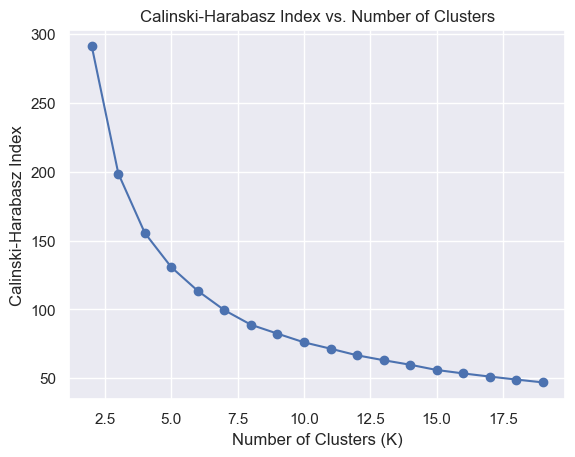

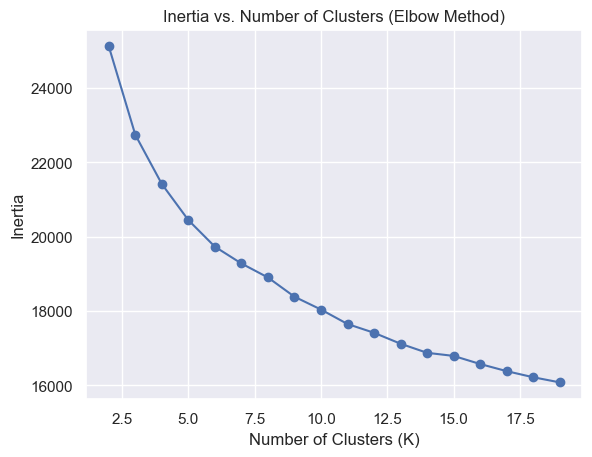

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import fowlkes_mallows_score
import random

import matplotlib.pyplot as plt

survey_data=dfno

# Select features (columns) for clustering
selected_features = dfno

# Optional: Standardize the data (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Specify the range of K values to try
k_values = range(2,20)

random_labels = [random.randint(0, 9) for _ in range(len(scaled_features))]

# Calculate the metrics for each K value

calinski_scores = []
inertia_values = []
davies_bouldin_values = []
silhouette_scores = []
fowlkes_mallows_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
#---------------------------------------------------------------------------------------------------------
    
    fowlkes_mallows_index = fowlkes_mallows_score(random_labels, cluster_labels)
    fowlkes_mallows_values.append(fowlkes_mallows_index)

#----------------------------------------------------------------------------------------------------------    
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
#----------------------------------------------------------------------------------------------------------    
    calinski_score = calinski_harabasz_score(scaled_features, cluster_labels)
    calinski_scores.append(calinski_score)
#----------------------------------------------------------------------------------------------------------   
    inertia_values.append(kmeans.inertia_)   
#----------------------------------------------------------------------------------------------------------
    cluster_centers = kmeans.cluster_centers_

    # Compute the pairwise distances between cluster centers
    cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')

    # Calculate the average distance within each cluster
    cluster_avg_distances = []
    for i in range(k):
        data_points_in_cluster = scaled_features[cluster_labels == i]
        avg_distance = np.mean(pairwise_distances(data_points_in_cluster, [cluster_centers[i]], metric='euclidean'))
        cluster_avg_distances.append(avg_distance)

    # Compute the Davies-Bouldin Index for this K value
    davies_bouldin_index = 0
    for i in range(k):
        max_ratio = 0
        for j in range(k):
            if j != i:
                ratio = (cluster_avg_distances[i] + cluster_avg_distances[j]) / cluster_distances[i, j]
                if ratio > max_ratio:
                    max_ratio = ratio
        davies_bouldin_index += max_ratio

    davies_bouldin_index /= k
    davies_bouldin_values.append(davies_bouldin_index)

    
#-------------------------------------------------------------------------------------------------------------------    
# Plot the Calinski-Harabasz Index values against the K values
plt.plot(k_values, calinski_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.grid(True)
plt.show()

print()

# Plot the inertia values vs. the number of clusters (K)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters (Elbow Method)')
plt.grid(True)
plt.show()

print()



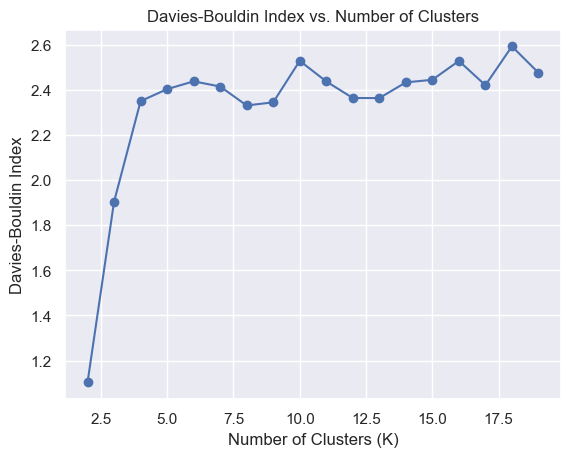

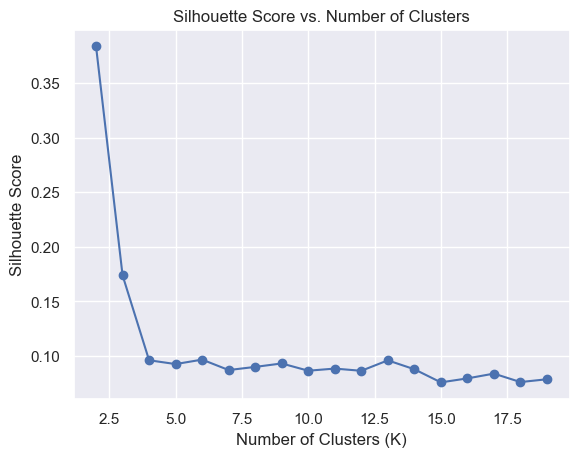

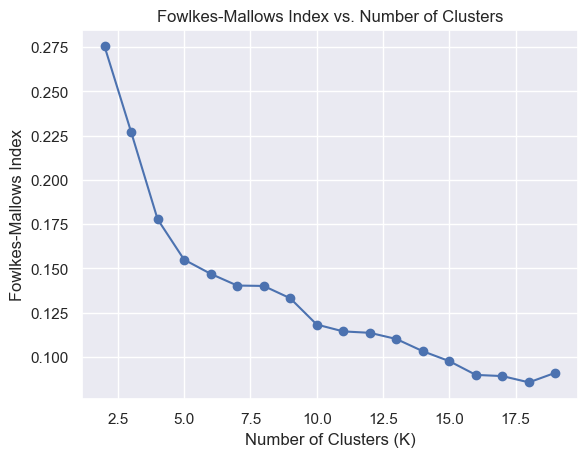

In [33]:
# Plot the Davies-Bouldin Index values against the K values
plt.plot(k_values, davies_bouldin_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.grid(True)
plt.show()

print()

# Plot the Silhouette Scores against the K values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

print()

plt.plot(k_values, fowlkes_mallows_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Fowlkes-Mallows Index')
plt.title('Fowlkes-Mallows Index vs. Number of Clusters')
plt.grid(True)
plt.show()

## Elbow points for each metric

In [34]:
def find_elbow_point(k_values, metric_values_dict):
    optimal_k_dict = {}

    for metric_name, metric_values in metric_values_dict.items():
        # Compute the first derivative of the metric values
        derivatives = np.gradient(metric_values)

        # Calculate the second derivative (curvature) of the metric values
        curvature = np.gradient(derivatives)

        # Find the index of the elbow point where the curvature starts to slow down
        elbow_index = np.argmax(curvature < np.mean(curvature))

        # Optimal K value is the one at the elbow index
        optimal_k_dict[metric_name] = k_values[elbow_index]

    return optimal_k_dict

metric_values_dict = {
    'Davies-Bouldin Index': davies_bouldin_values,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Index':calinski_scores,
    'Fowlkes-Mallows Index':fowlkes_mallows_values,
    'Inertia':inertia_values
    # Add other metrics as needed
}

optimal_k_dict = find_elbow_point(k_values, metric_values_dict)

for metric_name, optimal_k in optimal_k_dict.items():
    print(f"Optimal K based on {metric_name}: {optimal_k}")


Optimal K based on Davies-Bouldin Index: 2
Optimal K based on Silhouette Score: 6
Optimal K based on Calinski-Harabasz Index: 6
Optimal K based on Fowlkes-Mallows Index: 2
Optimal K based on Inertia: 7


When different evaluation metrics suggest different values for the optimum number of clusters (K), it can be challenging to determine definitively which metric is better. Each metric captures different aspects of the clustering quality, and the choice of the most appropriate metric depends on the specific context of your problem and your priorities. Here are some considerations to help you decide:

1. **Visual Inspection:** Plot the clustering results for different K values and evaluate them visually. Look for well-separated and distinct clusters. Visual inspection can provide intuitive insights into the quality of clustering and can guide your decision.

2. **Interpretability:** Consider the interpretability of the clusters for different K values. Sometimes, a lower number of clusters (lower K) may result in more interpretable and meaningful clusters for your domain.

3. **Domain Knowledge:** Rely on your domain knowledge and understanding of the data to determine which clustering result aligns better with your expectations. A metric may indicate one K value, but if it does not make sense in the context of your problem, you may prefer a different K value based on your knowledge.

4. **Stability and Consistency:** Check the stability and consistency of the clustering results across different runs or random initializations. A metric might suggest an optimum K value, but if the clustering results are not stable, it might not be reliable.

5. **Silhouette Plot:** If Silhouette Score is one of the metrics, consider plotting the Silhouette Scores for different K values. The Silhouette Plot can provide insights into the quality of clustering and the presence of well-defined clusters.

6. **Ensemble Methods:** If feasible, consider using ensemble methods like clustering ensemble or consensus clustering that combine multiple clustering results from different K values. These methods can provide a more robust clustering solution by leveraging the strengths of different K values.

7. **Real-World Performance:** Ultimately, the best metric is the one that leads to better performance in the real world. If possible, evaluate the clustering performance on a separate validation set or using real-world criteria relevant to your specific application.

8. **No Single Correct Answer:** Keep in mind that there might not be a single correct answer for the number of clusters. Clustering is an exploratory and unsupervised technique, and different values of K can provide different insights into the data.

In summary, choosing the best metric for clustering evaluation and deciding on the optimum number of clusters is often an iterative process that involves combining multiple sources of information. Be cautious about overfitting to a specific metric and consider a holistic evaluation approach to gain a comprehensive understanding of the clustering performance. Additionally, don't hesitate to rely on your domain expertise and intuition to make an informed decision.

## K-Means -Clustering

Input No. of clusters 2


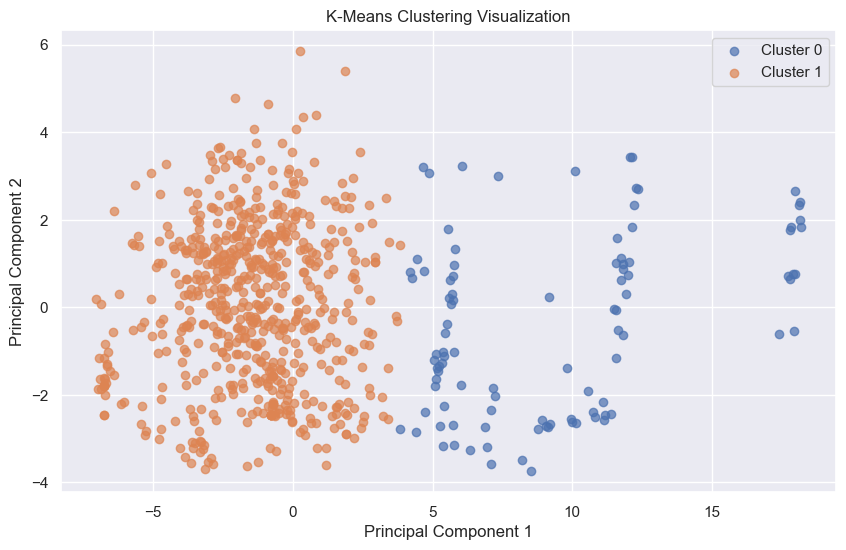

Silhouette Score: 0.3836538785614415
Inertia: 25118.725620288104
Davies-Bouldin Index: 0.3842898905490071
fowlkes_mallows_index : 0.2754812701265283
calinski_score : 291.1218669184146

Cluster Counts:
Cluster 0: 99 respondents
Cluster 1: 633 respondents



KeyboardInterrupt: Interrupted by user

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

get_clusters=int(input("Input No. of clusters "))
cluster_data = dfno

# Select features (columns) for clustering
selected_features = dfno
# Optional: Standardize the data (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Choose the number of clusters (K)
num_clusters = get_clusters

# Create the KMeans clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data and obtain cluster assignments
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
cluster_data['Cluster'] = cluster_labels

# Visualize the clusters using PCA for dimensionality reduction (for visualization purposes)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the reduced features and cluster labels
reduced_df = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = cluster_labels

# Plot the clusters in 2D space
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(reduced_df[reduced_df['Cluster'] == cluster]['PC1'], 
                reduced_df[reduced_df['Cluster'] == cluster]['PC2'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------

#Evaluation Metrics

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)

print("Silhouette Score:", silhouette_avg)
#------------------------------------------------------------------------------------------------------------

# Calculate the inertia (sum of squared distances to cluster centers)
inertia = kmeans.inertia_

print("Inertia:", inertia)

#------------------------------------------------------------------------------------------------------------
# Compute the Davies-Bouldin Index
davies_bouldin_index = 0
for i in range(num_clusters):
    max_ratio = 0
    for j in range(num_clusters):
        if j != i:
            ratio = (cluster_avg_distances[i] + cluster_avg_distances[j]) / cluster_distances[i, j]
            if ratio > max_ratio:
                max_ratio = ratio
    davies_bouldin_index += max_ratio

davies_bouldin_index /= num_clusters

print("Davies-Bouldin Index:", davies_bouldin_index)
#------------------------------------------------------------------------------------------------------------
# Compute fowlkes_mallows_index

fowlkes_mallows_index = fowlkes_mallows_score(random_labels, cluster_labels)
print("fowlkes_mallows_index :",fowlkes_mallows_index)

#------------------------------------------------------------------------------------------------------------
# Compute Calinski-Harabasz Index

calinski_score = calinski_harabasz_score(scaled_features, cluster_labels)
print("calinski_score :",calinski_score)

#------------------------------------------------------------------------------------------------------------
print()

# Assuming 'cluster_labels' is a list or array containing the cluster labels for each respondent
# 'cluster_labels' might look like [0, 1, 0, 2, 1, 0, ...], where each number represents the cluster assignment

# Count the number of respondents in each cluster
unique_clusters = set(cluster_labels)
cluster_counts = {cluster: sum(cluster_labels == cluster) for cluster in unique_clusters}

# Print the cluster counts
print("Cluster Counts:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} respondents")

print()
# Example: Check the cluster assignment for respondent at index 0
respondent_index = int(input("Check cluster for a specific respondent"))
assigned_cluster = cluster_labels[respondent_index]
print(f"Respondent at index {respondent_index} is assigned to Cluster {assigned_cluster}")


## DBSCAN Clustering

## Determining optimal eps value

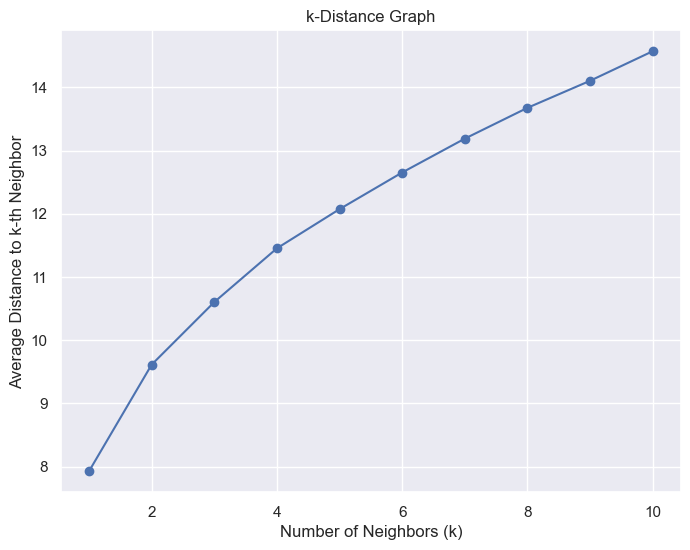

Optimal eps value: 7.9253079386884355


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def k_distance_graph(X, k_max=10, plot=True):
    """
    Compute the k-distance graph and identify the optimal eps value.

    Parameters:
    X (array-like): Input data matrix with shape (n_samples, n_features).
    k_max (int): Maximum value of k for the k-distance graph.
    plot (bool): Whether to plot the k-distance graph.

    Returns:
    optimal_eps (float): The optimal eps value.
    """

    # Compute k-distance graph
    k_distances = []
    nbrs = NearestNeighbors(n_neighbors=k_max+1, algorithm='auto').fit(X)
    distances, _ = nbrs.kneighbors(X)
    for k in range(1, k_max+1):
        k_distances.append(np.mean(distances[:, k]))

    # Plot k-distance graph (optional)
    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, k_max+1), k_distances, marker='o')
        plt.xlabel('Number of Neighbors (k)')
        plt.ylabel('Average Distance to k-th Neighbor')
        plt.title('k-Distance Graph')
        plt.grid(True)
        plt.show()

    # Find optimal eps value at the knee point
    gradients = np.gradient(k_distances)
    knee_index = np.argmax(gradients) + 1
    optimal_eps = k_distances[knee_index - 1]

    return optimal_eps

# Example usage:
# Assuming you have your data loaded into a variable X (array-like)
# Example:
X = dfno
optimal_eps = k_distance_graph(X)
print("Optimal eps value:", optimal_eps)


what maximum distance between two samples to be considered as neighbors (eps) 7.92
The minimum number of samples required to form a core point (min_samples) 3
Silhouette Score: -0.05138462251781475
Calinski-Harabasz Index: 1.641949762909965
Number of Clusters: 1
Number of Noise Points: 7


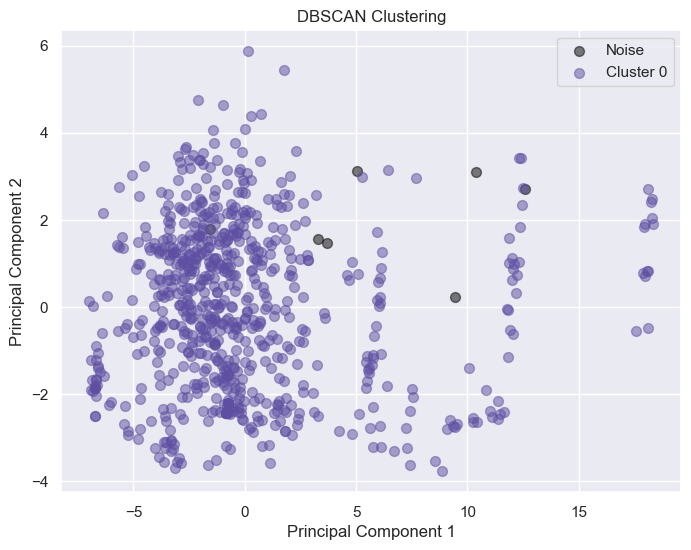

Cluster Counts:
Cluster 0: 725 respondents
Cluster -1: 7 respondents


KeyboardInterrupt: Interrupted by user

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

eps=float(input("what maximum distance between two samples to be considered as neighbors (eps) "))
min_samples=int(input("The minimum number of samples required to form a core point (min_samples) "))

# Select features (columns) for clustering
selected_features = dfno

# Optional: Standardize the data (if needed)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Create the DBSCAN clustering model
# Parameters:
# eps: The maximum distance between two samples to be considered as neighbors
# min_samples: The minimum number of samples required to form a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to the data and obtain cluster assignments
cluster_labels = dbscan.fit_predict(scaled_features)

# Evaluate clustering metrics
silhouette = silhouette_score(dfno, cluster_labels)
calinski_harabasz = calinski_harabasz_score(dfno, cluster_labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Number of clusters (ignoring noise, labeled as -1)
num_clusters = len(np.unique(cluster_labels)) - 1

# Number of noise points (labeled as -1)
num_noise_points = np.sum(cluster_labels == -1)

# Print the results
print("Number of Clusters:", num_clusters)
print("Number of Noise Points:", num_noise_points)

# Visualize the clusters in 2D
plt.figure(figsize=(8, 6))
unique_labels = np.unique(cluster_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points in black
        cluster_mask = cluster_labels == label
        plt.scatter(reduced_features[cluster_mask, 0], reduced_features[cluster_mask, 1], color='black', s=50, alpha=0.5, label='Noise')
    else:
        # Data points in clusters with different colors
        cluster_mask = cluster_labels == label
        plt.scatter(reduced_features[cluster_mask, 0], reduced_features[cluster_mask, 1], color=color, s=50, alpha=0.5, label=f'Cluster {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Assuming 'cluster_labels' is a list or array containing the cluster labels for each respondent
# 'cluster_labels' might look like [0, 1, 0, 2, 1, 0, ...], where each number represents the cluster assignment

# Count the number of respondents in each cluster
unique_clusters = set(cluster_labels)
cluster_counts = {cluster: sum(cluster_labels == cluster) for cluster in unique_clusters}

# Print the cluster counts
print("Cluster Counts:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} respondents")

# Example: Check the cluster assignment for respondent at index 0
respondent_index = int(input("Check cluster for a specific respondent"))
assigned_cluster = cluster_labels[respondent_index]
print(f"Respondent at index {respondent_index} is assigned to Cluster {assigned_cluster}")


## Agglomerative Clustering

Silhouette Score: 0.39828800177032486
Davies-Bouldin Index: 1.0758288431746215


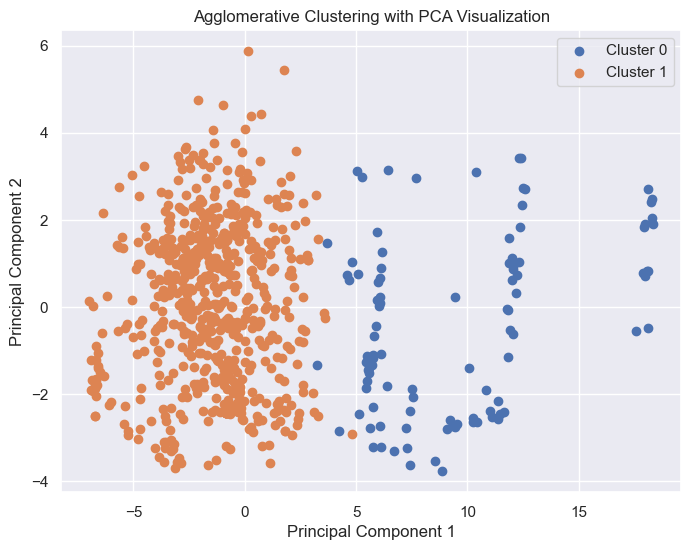

Cluster Counts:
Cluster 0: 100 respondents
Cluster 1: 632 respondents


KeyboardInterrupt: Interrupted by user

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA


# Data Preprocessing: Standardize the data
scaler = StandardScaler()
dfno_scaled = scaler.fit_transform(dfno)

# Create the Agglomerative Clustering model
n_clusters = 2  # You can adjust the number of clusters as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model to the data and obtain cluster assignments
cluster_labels = agglomerative.fit_predict(dfno_scaled)

# Evaluate clustering metrics
silhouette = silhouette_score(dfno_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(dfno_scaled, cluster_labels)

# Print the metrics
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
dfno_pca = pca.fit_transform(dfno_scaled)

# Visualize the clustering results in 2D
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters):
    cluster_mask = cluster_labels == cluster_num
    plt.scatter(dfno_pca[cluster_mask, 0], dfno_pca[cluster_mask, 1], label=f'Cluster {cluster_num}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering with PCA Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Assuming 'cluster_labels' is a list or array containing the cluster labels for each respondent
# 'cluster_labels' might look like [0, 1, 0, 2, 1, 0, ...], where each number represents the cluster assignment

# Count the number of respondents in each cluster
unique_clusters = set(cluster_labels)
cluster_counts = {cluster: sum(cluster_labels == cluster) for cluster in unique_clusters}

# Print the cluster counts
print("Cluster Counts:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} respondents")

# Example: Check the cluster assignment for respondent at index 0
respondent_index =int(input("Check cluster for a specific respondent"))
assigned_cluster = cluster_labels[respondent_index]
print(f"Respondent at index {respondent_index} is assigned to Cluster {assigned_cluster}")


In the context of silhouette scores for two clusters, a higher silhouette score indicates better clustering quality. Therefore, in your case, K-means with a silhouette score of 0.3836538785614415 is considered better than the agglomerative clustering method with a silhouette score of 0.31448505885784994.

The silhouette score measures how well each data point fits into its assigned cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates that the data point is well-clustered and has good separation from other clusters.

A silhouette score of 0.3836538785614415 for K-means suggests that the clusters produced by K-means have relatively high cohesion (data points within the same cluster are close to each other) and good separation (data points in different clusters are far from each other).

On the other hand, the silhouette score of 0.31448505885784994 for the alternative clustering method indicates that it has lower cohesion and/or separation compared to K-means, making it less favorable in this particular case.

Keep in mind that while the silhouette score is a useful metric for comparing different clustering methods, it is essential to consider other factors and validation techniques to make a comprehensive assessment of the clustering results, such as the interpretability of the clusters and domain-specific requirements.

Davies-Bouldin Index: 0.3842898905490071 for K-means
Davies-Bouldin Index: 1.256721679028254 for agglomerative
In this case, the K-means clustering algorithm has a lower DBI value (0.384) compared to the agglomerative clustering algorithm (1.257). Since K-means has a lower DBI, it suggests that K-means produces better-defined and more separated clusters for your data compared to agglomerative clustering.

